In [2]:
import pandas as pd
import numpy as np
import random
import math
from scipy.stats import norm
#setting random seed
# Seed = 8415
# random.seed(Seed)
# np.random.seed(Seed)

#read csv
df = pd.read_csv('Wine.csv')
data = []
for i in df.iloc:
    data.append(list(i))
#random train and test data
random.shuffle(data)
test = []
test_label = []
train = []
train_label = []
#slice training data and testing data
slice_num = [0, 0, 0]
for i in data:
    if slice_num[int(i[0])-1] < 18:
        test.append(i[1:])
        test_label.append(i[0])
        slice_num[int(i[0])-1] += 1
    else:
        train.append(i[1:])
        train_label.append(i[0])
train = np.array(train)
test = np.array(test)
print(train.shape, test.shape, len(train_label), len(test_label))
#pior from training data
config = [train_label.count(1)/124, train_label.count(2)/124, train_label.count(3)/124]
#set how many feature be used
feature_num = train.shape[1]
print(config)
#write csv
with open("train.csv", "w") as f:
    for i in range(len(train)):
        f.write(str(train_label[i]))
        for i in train[i]:
            f.write(',')
            f.write(str(i))
        f.write('\n')
with open("test.csv", "w") as f:
    for i in range(len(test)):
        f.write(str(test_label[i]))
        for i in test[i]:
            f.write(',')
            f.write(str(i))
        f.write('\n')

(124, 13) (54, 13) 124 54
[0.33064516129032256, 0.4274193548387097, 0.24193548387096775]


In [3]:
#Gaussian distribution
def normal_distribution(mean, sigma):
    return lambda x: np.exp(-1*((x-mean)**2)/(2*(sigma**2)))/(math.sqrt(2*np.pi) * sigma)

In [4]:
# get likelihood
def likelihood(data, goal, label, no_slice=False):
    train = []
    if no_slice == False:
        for i in range(len(data)):
            if label[i] == goal:
                train.append(data[i])
    else:
        train = data
    mean = []
    scale = []
    #get mean and std to build gaussian distribution
    for i in range(feature_num):
#         mean.append(0)
#         scale.append(0)
#         for train_slice in train:
#             mean[i] += train_slice[i]
#         mean[i] /= len(train)
#         for train_slice in train:
#             scale[i] += (train_slice[i] - mean[i])**2
#         scale[i] /= len(train)
        mean.append(np.mean(np.array([train_slice[i] for train_slice in train])))
        scale.append(np.std(np.array([train_slice[i] for train_slice in train])))
    return [norm(mean[i], scale[i]).pdf for i in range(13)]

In [5]:
#predict
def prediction(data, label):
    pred = []
    li = [likelihood(data, 1, label), likelihood(data, 2, label), likelihood(data, 3, label)]
    
    for i in data:
        prob_n = []
        for num in range(3):
            prob = 1
            #likelihood * pior
            for q in range(len(i)):
                prob *= li[num][q](i[q])
            prob *= config[num]
            prob_n.append(prob)
        #check which probability is highest
        pred.append(prob_n.index(max(prob_n))+1)
    #check accurate
    acc = 0
    for i in range(len(pred)):
        if pred[i] == label[i]:
            acc += 1
#         else:
#             print("Wrong Answer:",pred[i],label[i])
    acc /= len(pred)
    return acc, pred

Flavanoids


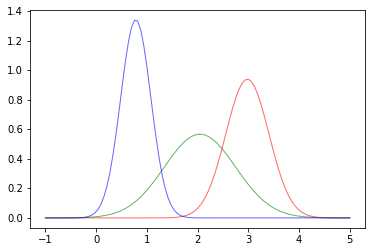

In [26]:
import matplotlib.pyplot as plt
x = np.linspace(-1, 5, 100)
li = [likelihood(train, 1, train_label), likelihood(train, 2, train_label), likelihood(train, 3, train_label)]
fig, ax = plt.subplots(1, 1)
ax.plot(x, li[0][6](x),
       'r-', lw=1, alpha=0.6, label='label 1')
# # plt.subplots()
ax.plot(x, li[1][6](x),
       'g-', lw=1, alpha=0.6, label='label 2')
# # plt.subplots()
ax.plot(x, li[2][6](x),
       'b-', lw=1, alpha=0.6, label='label 3')
print(df.columns[6+1])

In [5]:
print(prediction(test, test_label))

(1.0, [3, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 3, 1, 1, 3, 2, 2, 3, 2, 3, 1, 3, 1, 1, 1, 2, 3, 3, 2, 1, 2, 2, 3, 2, 2, 1, 3, 1, 2, 3, 3, 2, 3, 3, 2, 2, 1, 1])


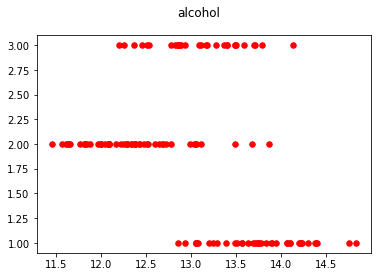

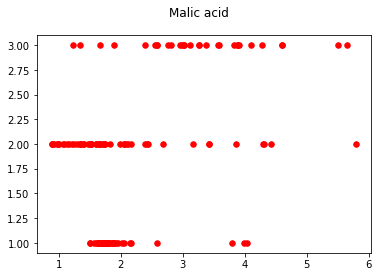

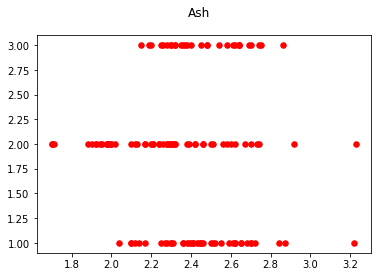

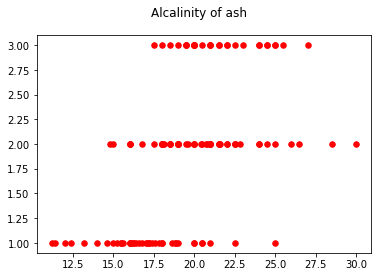

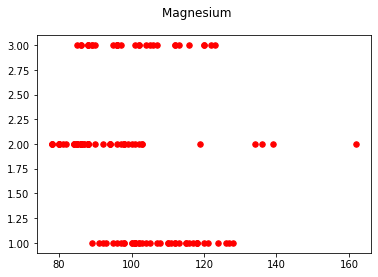

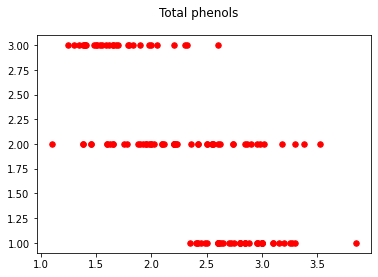

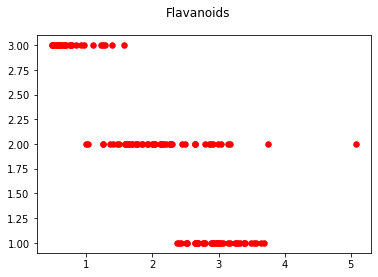

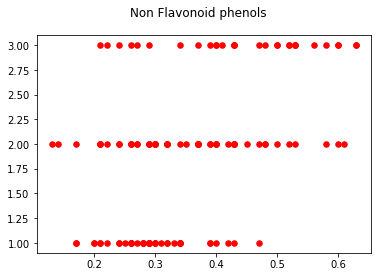

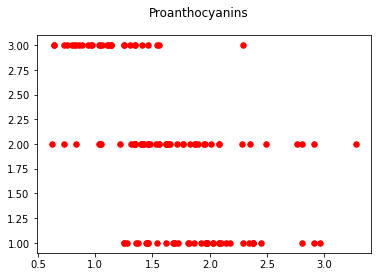

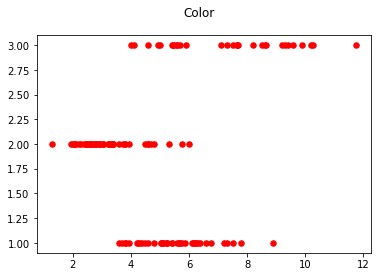

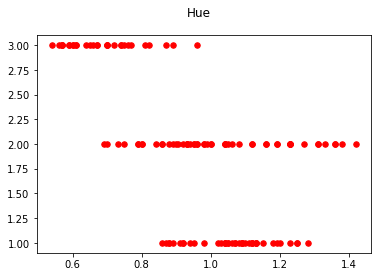

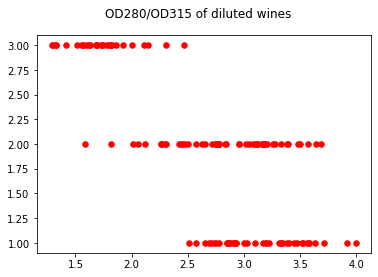

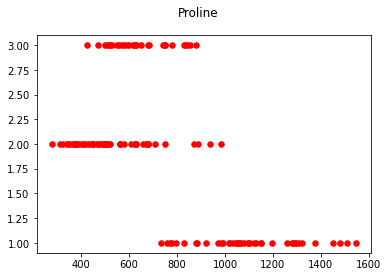

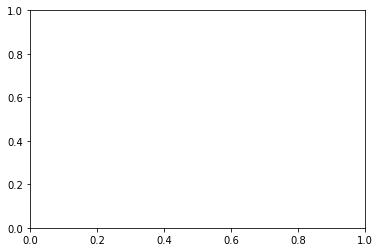

In [6]:
li = likelihood(train, 1, train_label)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(13):
    plt.suptitle(df.columns[i+1])
    for q in range(len(train_label)):
        plt.scatter(train[q][i], train_label[q], s = 30 ,c="r")
    plt.subplots()

transformed shape: (124, 2)


<Figure size 432x288 with 0 Axes>

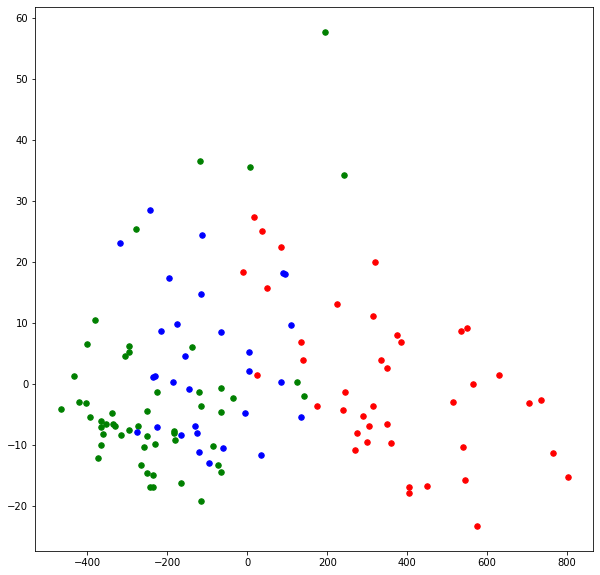

In [7]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train)
X_pca = pca.transform(train)
print("transformed shape:", X_pca.shape)
# plt.plot(X_pca, train_label, 'o', lw=5, alpha=0.6, label='pca')
plt.suptitle("train 2D PCA")
fig = plt.figure(figsize=[10,10])
for i in range(len(X_pca)):
    plt.scatter(X_pca[i][0], X_pca[i][1], s = 30 ,marker=' ox^'[int(train_label[i])], c=" rgb"[int(train_label[i])])

transformed shape: (124, 3)


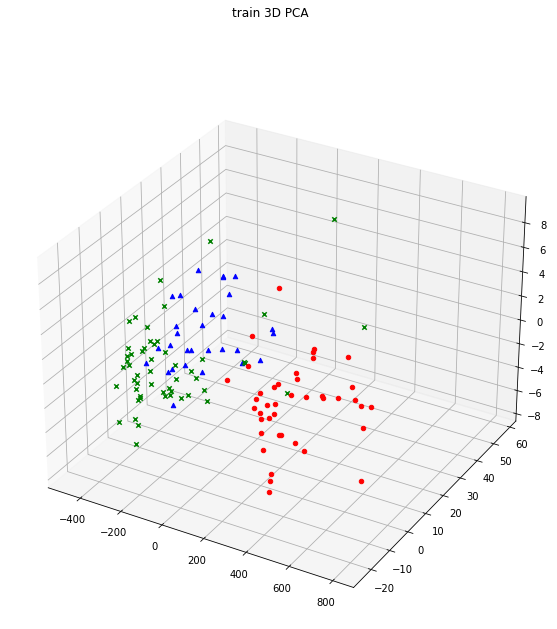

In [8]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(train)
X_pca = pca.transform(train)
print("transformed shape:", X_pca.shape)
# plt.plot(X_pca, train_label, 'o', lw=5, alpha=0.6, label='pca')
fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
plt.suptitle("train 3D PCA")
for i in range(len(X_pca)):
    if train_label[i] == 1:
        ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2] , marker='o', c='r')
    elif train_label[i] == 2:
        ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2] , marker='x', c='g')
    elif train_label[i] == 3:
        ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2] , marker='^', c='b')

transformed shape: (54, 2)


<Figure size 432x288 with 0 Axes>

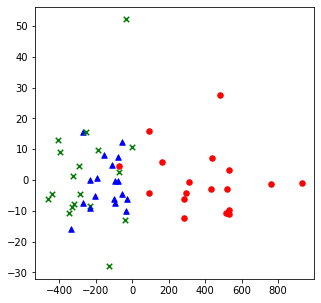

In [11]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(test)
X_pca = pca.transform(test)
print("transformed shape:", X_pca.shape)
# plt.plot(X_pca, train_label, 'o', lw=5, alpha=0.6, label='pca')
plt.suptitle("test 2D PCA")
fig = plt.figure(figsize=[5,5])
for i in range(len(X_pca)):
    plt.scatter(X_pca[i][0], X_pca[i][1], s = 30 ,marker=' ox^'[int(test_label[i])],c=" rgb"[int(test_label[i])])

transformed shape: (54, 3)


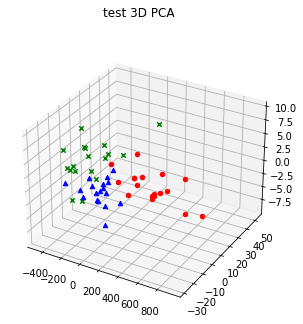

In [10]:

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(test)
X_pca = pca.transform(test)
print("transformed shape:", X_pca.shape)
# plt.plot(X_pca, train_label, 'o', lw=5, alpha=0.6, label='pca')
fig = plt.figure(figsize=[5,5])
ax = fig.gca(projection='3d')
plt.suptitle("test 3D PCA")
for i in range(len(X_pca)):
    if test_label[i] == 1:
        ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2] , marker='o', c='r')
    elif test_label[i] == 2:
        ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2] , marker='x', c='g')
    elif test_label[i] == 3:
        ax.scatter(X_pca[i][0], X_pca[i][1], X_pca[i][2] , marker='^', c='b')